In [2]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

In [3]:
# Load the Xception model
# https://keras.io/api/applications/xception/
model = Xception(
    include_top=True,
    weights='imagenet')

91884032/91884032 [==============================] - 2s 0us/step


In [4]:
# Default Image Size for Xception
image_size = (299, 299)

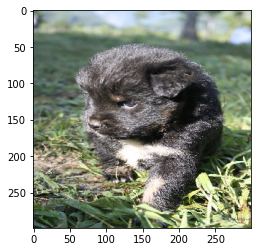

In [5]:
# Load the image and resize to the input dimensions that Xception
# was trained with
from urllib.request import urlopen
from io import BytesIO
image_path = "https://static.bc-edx.com/data/dl-1-2/m23/lessons/2/img/pup.jpg"
with urlopen(image_path) as raw:
    img = image.load_img(BytesIO(raw.read()), target_size=image_size)
plt.imshow(img)

In [6]:
# Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02111277', 'Newfoundland', 0.25438258), ('n02104365', 'schipperke', 0.090333), ('n02108551', 'Tibetan_mastiff', 0.08263817)]


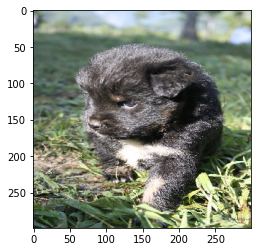

In [7]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [8]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use Xception to label image"""
    with urlopen(image_path) as raw:
        img = image.load_img(BytesIO(raw.read()), target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0])

1/1 [==============================] - 0s 367ms/step
Predicted: [('n02123394', 'Persian_cat', 0.18115048), ('n02123045', 'tabby', 0.1335955), ('n02123159', 'tiger_cat', 0.08032117)]


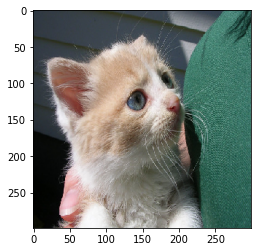

In [10]:
image_path = "https://static.bc-edx.com/data/dl-1-2/m23/lessons/2/img/kitten.jpg"
predict(image_path)